<center><h1>Primer Páctico Series Temporales</h1></center>
<center><h2>Minutos destinados a llamadas telefónicas</h2></center>
<br>

En este práctico utilizamos como fuente la ENACOM que publica trimestralmente los minutos destinados a llamadas telefónicas, distinguiendo entre planes abono y prepago.




In [16]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [17]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [18]:
plt.rcParams['figure.figsize'] = [15, 10]

## Carga y modificación de datos

Se carga la base de datos descripta anteriormente y se crea una nueva columna "Fecha" que resguarda en formato apropiado el período asociado a cada registro (trimestral).

In [19]:
data=pd.read_csv('datasets/Telefonia_movil.csv')

In [20]:
data['Fecha'] = data['Año'].map(str)+'Q'+data['Trimestre'].map(str)
data.tail()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo,Fecha
20,2018,1,13.423.580,5850985,19274565,Ene-Mar 2018,2018Q1
21,2018,2,14.240.217,6027374,20267591,Abr-Jun 2018,2018Q2
22,2018,3,14.574.305,6108477,20682782,Jul-Sept 2018,2018Q3
23,2018,4,14.915.060,6613685,21528745,Oct-Dic 2018,2018Q4
24,2019,1,13.937.271,6427084,20364355,Ene-Mar 2019,2019Q1


In [21]:
data_1 = pd.to_datetime(data['Fecha'])
data['Fecha'] = pd.PeriodIndex(data_1, freq='Q')
data[:5]

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo,Fecha
0,2013,1,8.785.943,6582117,15368060,Ene-Mar 2013,2013Q1
1,2013,2,9.512.689,7108640,16621329,Abr-Jun 2013,2013Q2
2,2013,3,10.315.484,7335154,17650638,Jul-Sept 2013,2013Q3
3,2013,4,9.809.515,6250549,16060064,Oct-Dic 2013,2013Q4
4,2014,1,10.128.751,5799223,15927974,Ene-Mar 2013,2014Q1


In [22]:
data['Minutos pospago salientes (miles)'] = data['Minutos pospago salientes (miles)'].str.replace('.', '').astype(int)
data.index=data['Fecha']

In [23]:
phone = pd.DataFrame(data, columns=['Minutos pospago salientes (miles)', 'Minutos prepago salientes (miles)', 'Total de minutos salientes (miles)'])
phone.dtypes

Minutos pospago salientes (miles)     int32
Minutos prepago salientes (miles)     int64
Total de minutos salientes (miles)    int64
dtype: object

## Exploratory data analysis

En una primera instancia, se observa una marcada tendencia alcista de los minutos consumidos mediante líneas pospago y una tendencia decreciente de los minutos por línas prepagas. 

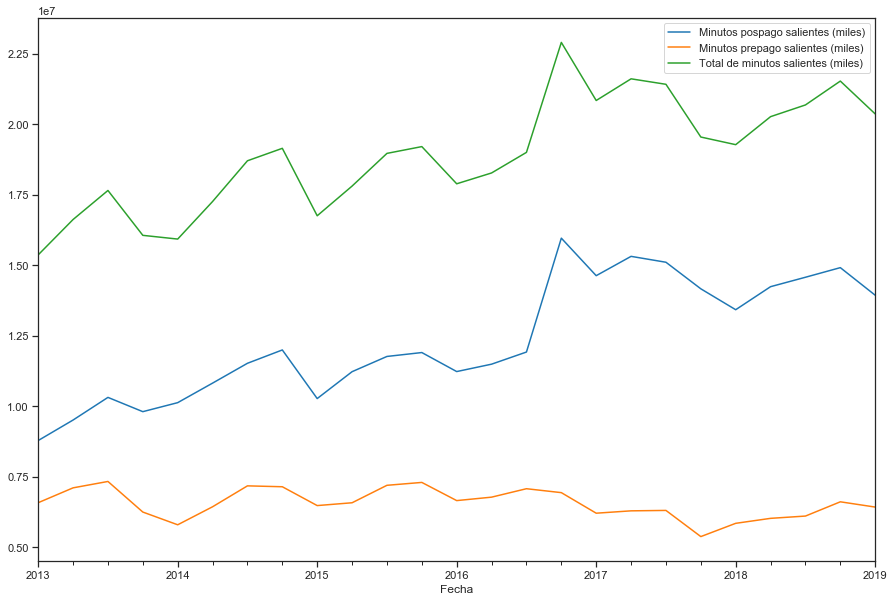

In [24]:
#figsize=(9,6))
phone.plot()
plt.show()

In [25]:
phone['quarter'] = phone.index.quarter
phone['year'] = phone.index.year

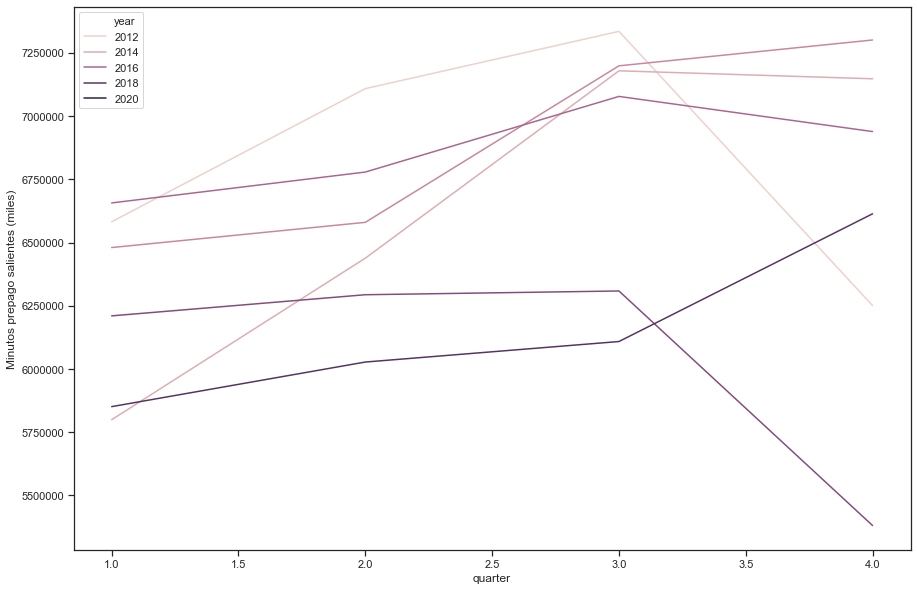

In [26]:
sns.lineplot('quarter','Minutos prepago salientes (miles)',hue='year',data=phone, markers='None');

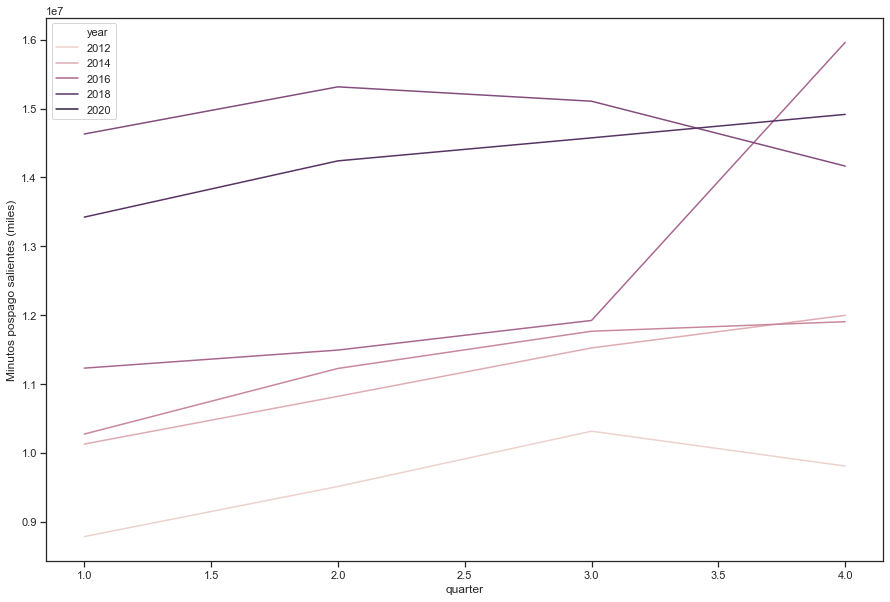

In [27]:
sns.lineplot('quarter','Minutos pospago salientes (miles)',hue='year',data=phone, markers='None');

In [28]:
phone.describe().round(2)

,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),quarter,year
count,25.00,25.0,25.00,25.00,25.00
mean,12359295.44,6562909.4,18922204.72,2.44,2015.64
std,2085582.33,516860.4,1982378.31,1.16,1.85
min,8785943.00,5380710.0,15368060.00,1.00,2013.00
25%,10821463.00,6250549.0,17650638.00,1.00,2014.00
50%,11905073.00,6579819.0,19001229.00,2.00,2016.00
75%,14240217.00,7077838.0,20364355.00,3.00,2017.00
max,15960765.00,7335154.0,22899656.00,4.00,2019.00


## Random walk 

In [29]:
# ultimos valores de la serie original
phone = phone.drop(['quarter', 'year', 'Total de minutos salientes (miles)'], axis=1)
phone.tail()

,Minutos pospago salientes (miles),Minutos prepago salientes (miles)
Fecha,,
2018Q1,13423580,5850985
2018Q2,14240217,6027374
2018Q3,14574305,6108477
2018Q4,14915060,6613685
2019Q1,13937271,6427084


In [30]:
phone.dtypes

Minutos pospago salientes (miles)    int32
Minutos prepago salientes (miles)    int64
dtype: object

con el random walk mantiene el último valor de la serie

In [31]:
h = 4  # H sirve hasta cuanto queremos predecir. en este caso un año (4 trimestres)
test=pd.period_range(start=phone.index[-1]+1, periods=h, freq='Q')
test

PeriodIndex(['2019Q2', '2019Q3', '2019Q4', '2020Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Random Walk para las líneas pospagas

In [32]:
pred_pos=pd.Series(np.repeat(phone['Minutos pospago salientes (miles)'].iloc[-1], h), index=test) # the forecast repeats the last observed values h times
pred_pos

2019Q2    13937271
2019Q3    13937271
2019Q4    13937271
2020Q1    13937271
Freq: Q-DEC, dtype: int32

In [33]:
resid_pos=phone['Minutos pospago salientes (miles)']-phone['Minutos pospago salientes (miles)'].shift(1) # the shift lags the series by one period
sigma_pos = resid_pos.std()
round(sigma_pos,3)

1111026.926

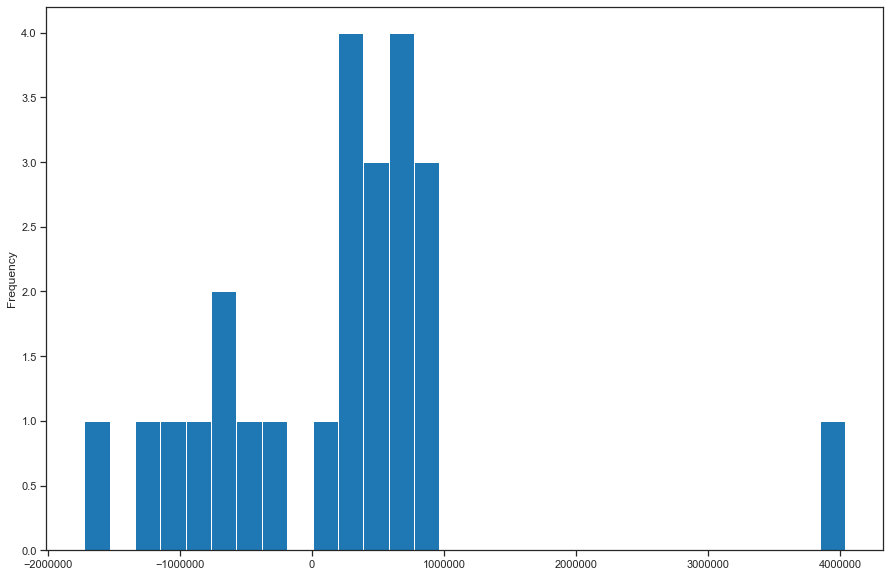

In [34]:
resid_pos.plot.hist(bins=30)

In [35]:
intv_pos = pd.concat([pred_pos-stats.norm.ppf(0.975)*sigma_pos*np.sqrt(np.arange(1,h+1)),
                   pred_pos+stats.norm.ppf(0.975)*sigma_pos*np.sqrt(np.arange(1,h+1))], axis=1)
intv_pos.round(3)

,0,1
2019Q2,1.175970e+07,1.611484e+07
2019Q3,1.085772e+07,1.701682e+07
2019Q4,1.016560e+07,1.770894e+07
2020Q1,9.582125e+06,1.829242e+07


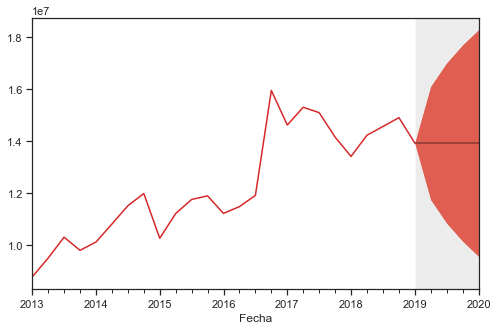

In [36]:
from plotting import fanchart

point_pred = (intv_pos[0]+intv_pos[1])/2

fig, ax = fanchart(phone['Minutos pospago salientes (miles)'],point_pred,intv_pos,intv_pos,intv_pos)

plt.show()

### Random Walk para las líneas prepagas

In [37]:
pred_pre=pd.Series(np.repeat(phone['Minutos prepago salientes (miles)'].iloc[-1], h), index=test) # the forecast repeats the last observed values h times
pred_pre

2019Q2    6427084
2019Q3    6427084
2019Q4    6427084
2020Q1    6427084
Freq: Q-DEC, dtype: int64

In [38]:
resid_pre=phone['Minutos prepago salientes (miles)']-phone['Minutos prepago salientes (miles)'].shift(1) # the shift lags the series by one period
sigma_pre = resid_pre.std()
round(sigma_pre,3)

510832.977

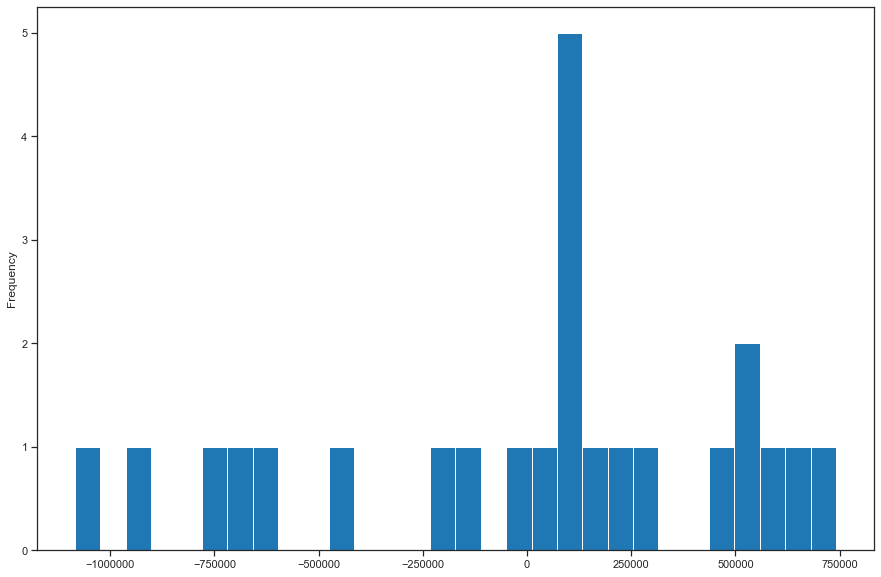

In [39]:
resid_pre.plot.hist(bins=30)

#los residuos deberían presentar una forma de distribución normal para poder calcular el intervalo de confianza
#se observa los valores en torno al 0, aproximadamente se aproxima a una distribucion normal

In [40]:
intv_pre = pd.concat([pred_pre-stats.norm.ppf(0.975)*sigma_pos*np.sqrt(np.arange(1,h+1)),
                   pred_pre+stats.norm.ppf(0.975)*sigma_pos*np.sqrt(np.arange(1,h+1))], axis=1)
intv_pre.round(3)

,0,1
2019Q2,4249511.239,8.604657e+06
2019Q3,3347531.068,9.506637e+06
2019Q4,2655417.341,1.019875e+07
2020Q1,2071938.478,1.078223e+07


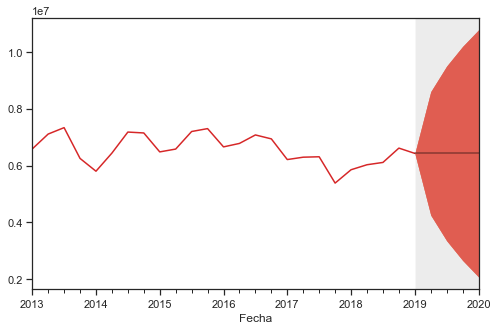

In [41]:
point_pred_pre = (intv_pre[0]+intv_pre[1])/2

fig, ax = fanchart(phone['Minutos prepago salientes (miles)'],point_pred_pre,intv_pre,intv_pre,intv_pre)

plt.show()

## Simple exponential smoothing

In [42]:
phone = phone.astype(float)
phone.dtypes

Minutos pospago salientes (miles)    float64
Minutos prepago salientes (miles)    float64
dtype: object

### Exponential Smoothing para líneas pospagas

In [43]:
model_ses_pos = sm.tsa.SimpleExpSmoothing(phone['Minutos pospago salientes (miles)']).fit()
fitted_ses_pos = model_ses_pos.fittedvalues
model_ses_pos.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,SimpleExpSmoothing,SSE,28393926159405.254
Optimized:,True,AIC,697.958
Trend:,None,BIC,700.396
Seasonal:,None,AICC,699.958
Seasonal Periods:,None,Date:,"Mon, 23 Sep 2019"
Box-Cox:,False,Time:,15:59:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7871933,alpha,True
initial_level,8.786e+06,l.0,True


In [44]:
mse_ses_pos = sm.tools.eval_measures.mse(phone['Minutos pospago salientes (miles)'],fitted_ses_pos)
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses_pos))

 In-sample fit:
 MSE               1135757046376.210


In [45]:
N = len(phone['Minutos pospago salientes (miles)'])
loglik_ses_pos=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses_pos)
aic_ses_pos=-2*loglik_ses_pos+2*3
bic_ses_pos=-2*loglik_ses_pos+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses_pos))
print(' AIC               {0:.3f}'.format(aic_ses_pos))
print(' BIC               {0:.3f}'.format(bic_ses_pos))

 Log-likelihood    -382.452
 AIC               770.905
 BIC               774.562


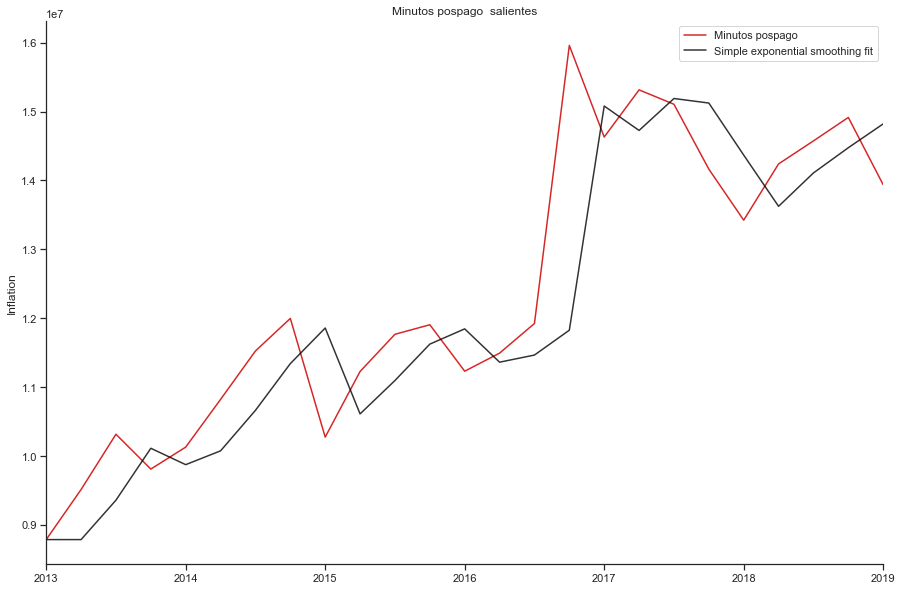

In [46]:
fig, ax= plt.subplots();#figsize=(9,6))
phone['Minutos pospago salientes (miles)'].plot(color=red, label='Minutos pospago')
fitted_ses_pos.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Inflation')
ax.set_title('Minutos pospago  salientes')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

### Exponential Smoothing para líneas prepagas


In [47]:
model_ses_pre = sm.tsa.SimpleExpSmoothing(phone['Minutos prepago salientes (miles)']).fit()
fitted_ses_pre = model_ses_pre.fittedvalues
model_ses_pre.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,SimpleExpSmoothing,SSE,5832098079555.361
Optimized:,True,AIC,658.388
Trend:,None,BIC,660.826
Seasonal:,None,AICC,660.388
Seasonal Periods:,None,Date:,"Mon, 23 Sep 2019"
Box-Cox:,False,Time:,15:59:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4324486,alpha,True
initial_level,6.7286e+06,l.0,True


In [48]:
mse_ses_pre = sm.tools.eval_measures.mse(phone['Minutos prepago salientes (miles)'],fitted_ses_pre)
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses_pre))

 In-sample fit:
 MSE               233283923182.214


In [49]:
N = len(phone['Minutos prepago salientes (miles)'])
loglik_ses_pre=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses_pre)
aic_ses_pre=-2*loglik_ses_pre+2*3
bic_ses_pre=-2*loglik_ses_pre+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses_pre))
print(' AIC               {0:.3f}'.format(aic_ses_pre))
print(' BIC               {0:.3f}'.format(bic_ses_pre))

 Log-likelihood    -362.667
 AIC               731.335
 BIC               734.992


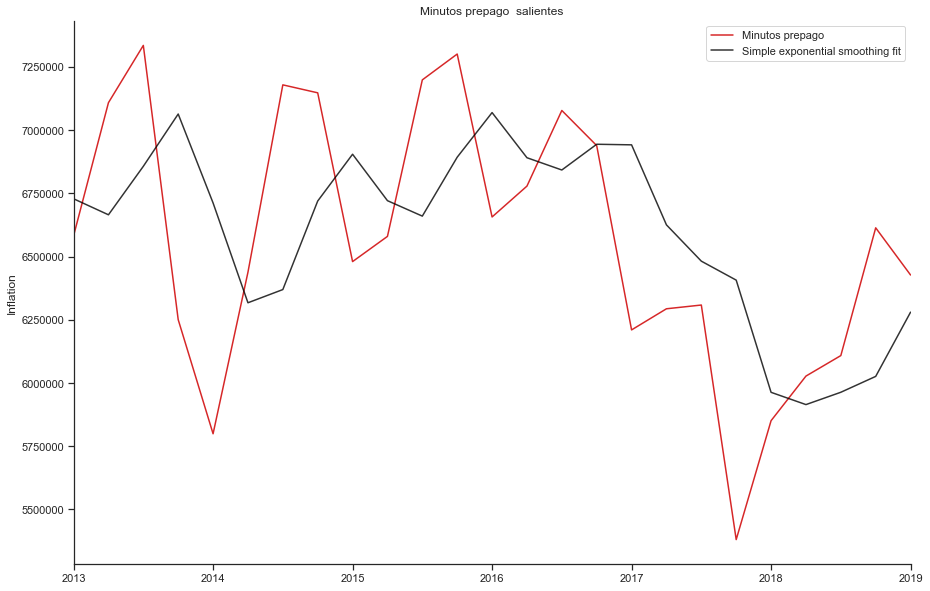

In [50]:
fig, ax= plt.subplots();#figsize=(9,6))
phone['Minutos prepago salientes (miles)'].plot(color=red, label='Minutos prepago')
fitted_ses_pre.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Inflation')
ax.set_title('Minutos prepago  salientes')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

## Model diagnostics


### Para lineas Pospagas

In [51]:
resid_pos=phone['Minutos pospago salientes (miles)']-fitted_ses_pos 

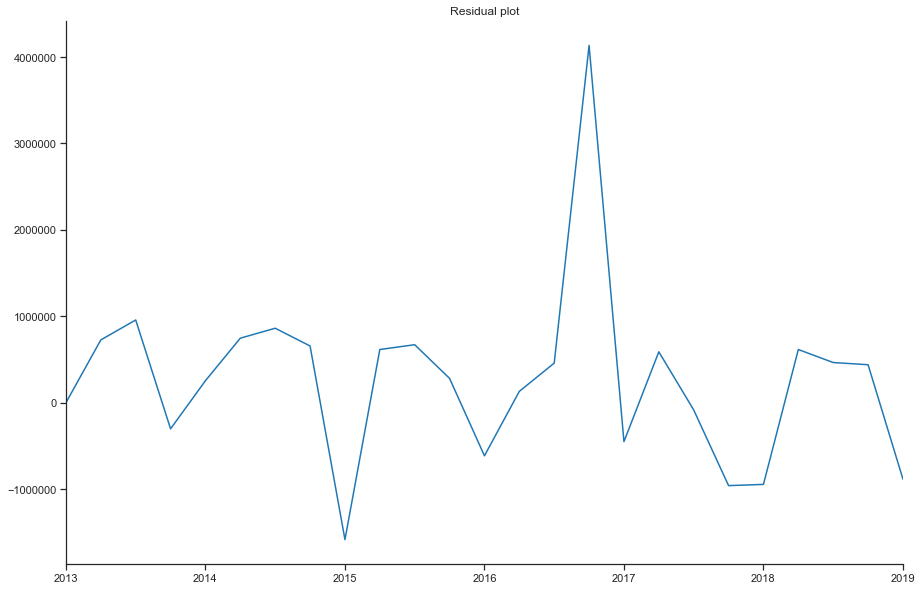

In [52]:
fig, ax= plt.subplots();#figsize=(9,6))
resid_pos.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

Next is the residual ACF plot aka correlogram

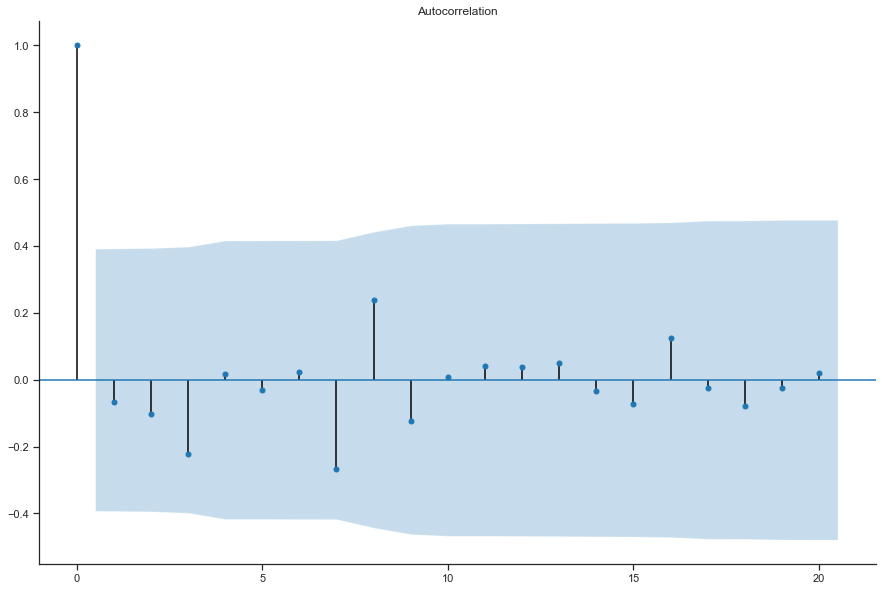

In [53]:
fig, ax = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid_pos, lags=20, ax=ax)
sns.despine()
plt.show()

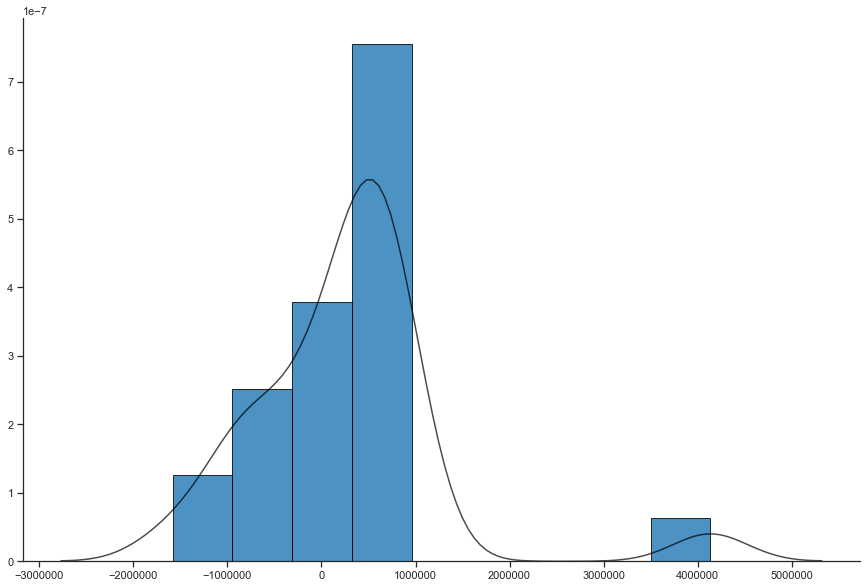

In [54]:
def hist(series):
    fig, ax= plt.subplots();#figsize=(9,6))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid_pos)
plt.show()

Tal como puede obervarse en los gráficos previos, los residuos del modelo para la línea pospagas no se encuentran conrrelacionados, y los mismos presentan una distribución normal

### Para lineas Prepagas

In [55]:
resid_pre=phone['Minutos prepago salientes (miles)']-fitted_ses_pre

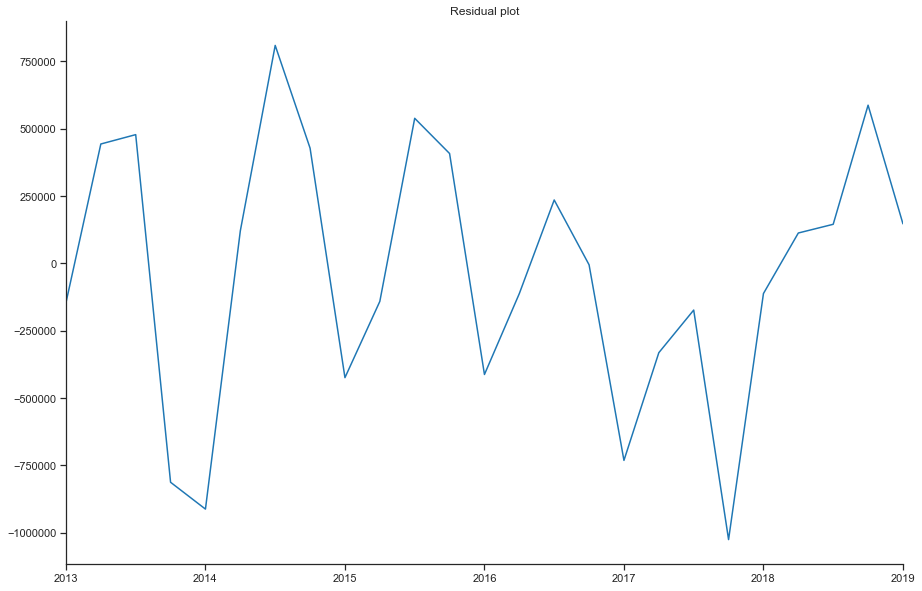

In [56]:
fig, ax= plt.subplots();#figsize=(9,6))
resid_pre.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

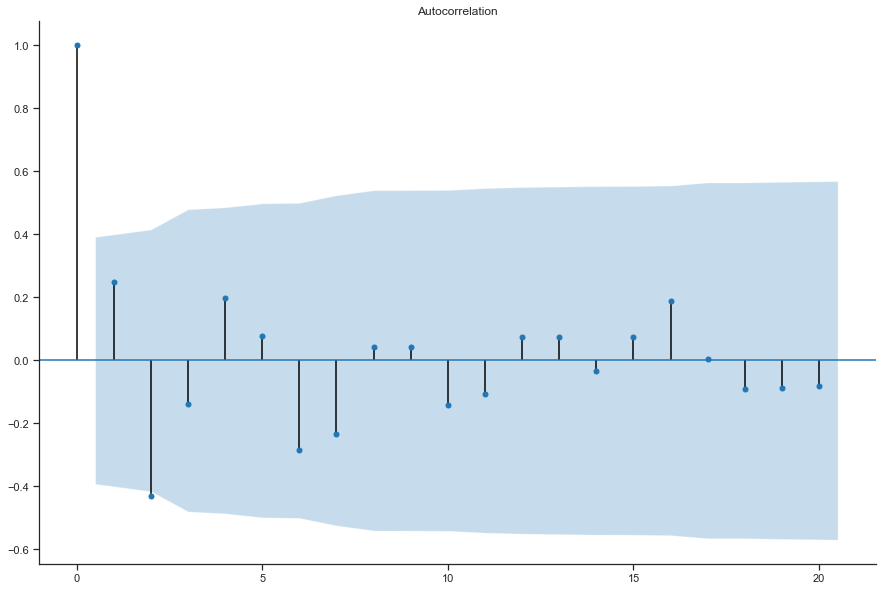

In [57]:
fig, ax = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid_pre, lags=20, ax=ax)
sns.despine()
plt.show()

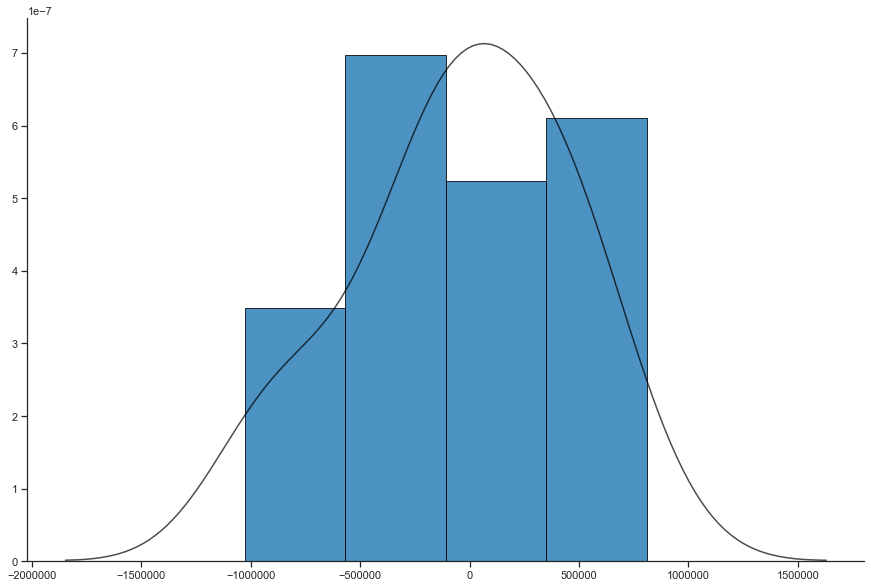

In [58]:
def hist(series):
    fig, ax= plt.subplots();#figsize=(9,6))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid_pre)
plt.show()

Tal como puede obervarse en los gráficos previos, los residuos del modelo para las líneas prepagas no se encuentran conrrelacionados, y los mismos presentan una distribución normal

## Model validation

### Predicciones para líneas pospagas

Se arma el dataset de training y test (70 y 30% aprox)

In [59]:
# Expanding window

validation=phone['Minutos pospago salientes (miles)']['2015Q1':].index 
start = phone['Minutos pospago salientes (miles)'].index.get_loc('2015Q1') 

pred1 = [] #random walk
pred2 = [] #SSE
actual= [] #valor real
for i in range(start, len(phone['Minutos pospago salientes (miles)'])):
    
    actual.append(phone['Minutos pospago salientes (miles)'].iloc[i]) # actual value
    
    pred1.append(phone['Minutos pospago salientes (miles)'].iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(phone['Minutos pospago salientes (miles)'].iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.tail()

C:\Users\valen\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,RW,SES,Actual
Fecha,,,
2018Q1,14164552.0,1.437298e+07,13423580.0
2018Q2,13423580.0,1.359029e+07,14240217.0
2018Q3,14240217.0,1.410813e+07,14574305.0
2018Q4,14574305.0,1.448075e+07,14915060.0
2019Q1,14915060.0,1.483210e+07,13937271.0


In [52]:
from scipy import stats

table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW,1254832.309,312408.194
SES,1284924.157,319479.669


### Predicciones para líneas prepagas

In [53]:
validation=phone['Minutos prepago salientes (miles)']['2015Q1':].index 
start = phone['Minutos prepago salientes (miles)'].index.get_loc('2015Q1') 

pred1 = [] #random walk
pred2 = [] #SSE
actual= [] #valor real
for i in range(start, len(phone['Minutos prepago salientes (miles)'])):
    
    actual.append(phone['Minutos prepago salientes (miles)'].iloc[i]) # actual value
    
    pred1.append(phone['Minutos prepago salientes (miles)'].iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(phone['Minutos prepago salientes (miles)'].iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.tail()

,RW,SES,Actual
Fecha,,,
2018Q1,5380710.0,6.652112e+06,5850985.0
2018Q2,5850985.0,5.888814e+06,6027374.0
2018Q3,6027374.0,5.961298e+06,6108477.0
2018Q4,6108477.0,6.026811e+06,6613685.0
2019Q1,6613685.0,6.264996e+06,6427084.0


In [55]:
table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW,442980.506,110237.027
SES,508339.819,124943.520


## Forecast



### Predicción para líneas pospagas

C:\Users\valen\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


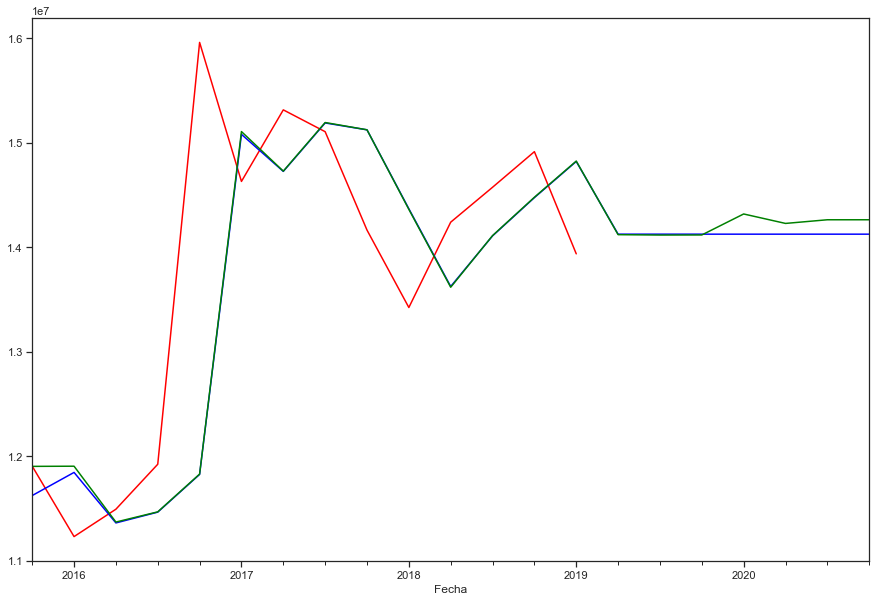

In [76]:
h=7
w=h*2  
data = phone['Minutos pospago salientes (miles)']
model = sm.tsa.SimpleExpSmoothing
pred_index = phone['Minutos pospago salientes (miles)'].index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit()  #en el rolling nos quedamos con un tail de w valores
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues  #aca aplica lo de cross-validation de expanding window y rolling window
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');

### Predicción para líneas prepagas


C:\Users\valen\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\valen\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\valen\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


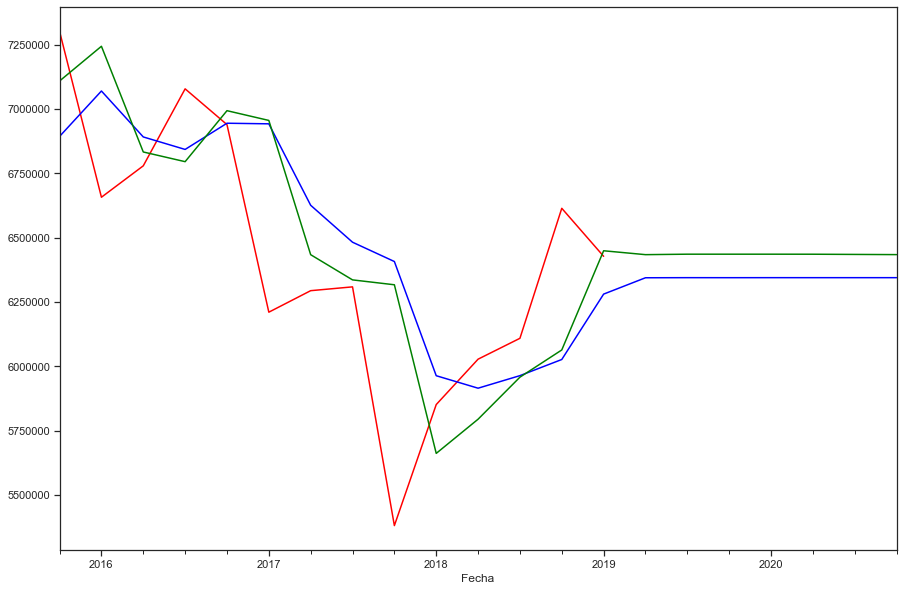

In [75]:
h=7
w=h*2  
data = phone['Minutos prepago salientes (miles)']
model = sm.tsa.SimpleExpSmoothing
pred_index = phone['Minutos prepago salientes (miles)'].index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit()  #en el rolling nos quedamos con un tail de w valores
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues  #aca aplica lo de cross-validation de expanding window y rolling window
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');